In [30]:
from skinbot.dataset import * 
from skinbot.config import read_config, Config
from skinbot.models import get_model
from torchvision.io import read_image
import matplotlib.pyplot as plt
import torch
import numpy as np
import cv2

In [2]:
root = './data'
labels = read_labels_xls(root, concat=True)


In [8]:
config = read_config()
C = Config()
C.set_config(config)

In [9]:
# all_dataloader = get_dataloaders(config, batch=16, mode='all')


In [10]:
all_dataloader = get_dataloaders(config, batch=16, mode='test', target='detectionSingle', fold_iteration=2)


In [11]:
for x,y in all_dataloader:
#     print('x: ', x)
    print('y: ', y)
    break

y:  ({'image_label': tensor(3), 'boxes': tensor([[7.3000e+02, 3.2000e+02, 2.2870e+03, 1.6590e+03],
        [1.0000e+00, 2.9500e+02, 7.8900e+02, 1.6530e+03],
        [1.1570e+03, 4.9400e+02, 1.6370e+03, 8.0900e+02],
        [1.4050e+03, 9.4500e+02, 1.7180e+03, 1.2660e+03],
        [1.5480e+03, 9.4900e+02, 2.8140e+03, 1.7570e+03]]), 'labels': tensor([1, 1, 1, 1, 1]), 'masks': tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0

# show images

In [17]:
log_interval = 1
log_interval = 1
config = read_config()
root_dir = config["DATASET"]["root"]
best_or_last = 'best'
only_eval = True
fold = 0
model_name = 'faster_rcnn_resnet50_fpn'
fuzzy_labels = False
EPOCHS = 100
LR = 0.00001
display_info = True
# gpu device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
dataset = all_dataloader.dataset

In [46]:

def plot_sample(idx, model_path):
    print('loading models')
    model, optimizer = get_model(model_name, optimizer='SGD', lr=LR)
    model.load_state_dict(torch.load(model_path))
    model.eval()
    print('done')
    # selects sample
    sample_19 = dataset[idx]
    x,y = sample_19
    x = torch.unsqueeze(x,0)
    # makes prediciont
    with torch.no_grad():
        pred_19 = model(x)
    #     pred_19 = torch.sigmoid(pred_19)
        pred_boxes, pred_class = process_prediction(pred_19,0.5)
    # plot bars and image
#     target_num_to_str = {v:k for k,v in C.labels.target_str_to_num.items()}
#     print(target_num_to_str)
    fname_19 = os.path.join(dataset.images_dir, dataset.image_fnames[idx])
    if not dataset.crop_lesion: # crop in target:
        image_19 = read_image(fname_19).numpy().transpose(1,2,0)
    else:
        image_19 = read_image(fname_19).numpy()
        cc = dataset._crop_boxes[dataset.image_fnames[idx]]
        image_19 = crop_lesion(image_19, cc).transpose(1,2,0)
    fig, ax = plt.subplots()
    detect_object(image_19, pred_boxes, pred_class, ax)
    plt.show()
    

In [75]:
def process_prediction(pred, confidence):
    """
    get_prediction

    """
#     target_num_str = {0:"LABEL", 1:"LESION"}
    target_num_str = {v:k for k,v in C.labels.target_str_to_num.items()}
    pred_class = [target_num_str[i] for i in list(pred[0]['labels'].numpy())]
    pred[0]['boxes'] = pred[0]['boxes'].long()
    pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())]
    pred_score = list(pred[0]['scores'].detach().numpy())
    pred_t = [pred_score.index(x) for x in pred_score if x>confidence]
    pred_t = pred_t[-1] if len(pred_t)>0 else 0
    pred_boxes = pred_boxes[:pred_t+1]
    pred_class = pred_class[:pred_t+1]
    return pred_boxes, pred_class



In [76]:
def detect_object(img, pred_boxes, pred_class, ax, rect_th=4, text_size=3, text_th=4):
    """
    object_detection
    """
    boxes, pred_cls = pred_boxes, pred_class
    # print(len(boxes))
    for i in range(len(boxes)):
        cv2.rectangle(img, boxes[i][0], boxes[i][1],color=(0, 255, 200), thickness=rect_th)
        cv2.putText(img,pred_cls[i], boxes[i][0], cv2.FONT_HERSHEY_SIMPLEX, text_size, (0,255,0),thickness=text_th)
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])


loading models
done

{'image_label': tensor(3), 'boxes': tensor([[7.3000e+02, 3.2000e+02, 2.2870e+03, 1.6590e+03],
        [1.0000e+00, 2.9500e+02, 7.8900e+02, 1.6530e+03],
        [1.1570e+03, 4.9400e+02, 1.6370e+03, 8.0900e+02],
        [1.4050e+03, 9.4500e+02, 1.7180e+03, 1.2660e+03],
        [1.5480e+03, 9.4900e+02, 2.8140e+03, 1.7570e+03]]), 'labels': tensor([1, 1, 1, 1, 1]), 'masks': tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
 

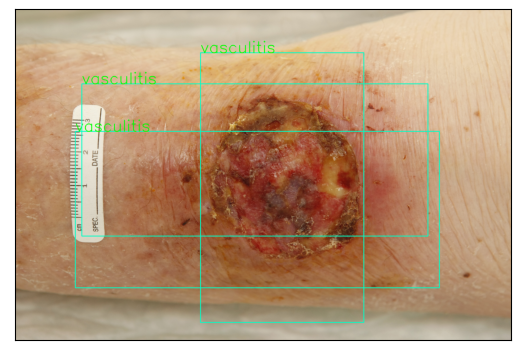

loading models
done

{'image_label': tensor(3), 'boxes': tensor([[6.3700e+02, 5.4400e+02, 2.9790e+03, 2.2140e+03],
        [1.0000e+00, 1.0000e+00, 3.8860e+03, 2.5900e+03]]), 'labels': tensor([1, 1]), 'masks': tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 1, 1,  ..., 0, 0, 0],
         [0, 1, 1,  ..., 0, 0, 0],
         ...,
         [0, 1, 1,  ..., 0, 0, 0],
         [0, 1, 1,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8), 'area': tensor([ 3911140., 10058265.]), 'iscrowd': tensor([0, 0]), 'image_id': tensor(-3224907904311439083)}


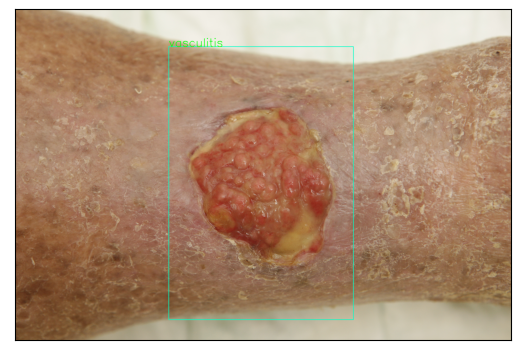

loading models
done

{'image_label': tensor(2), 'boxes': tensor([[1.0000e+00, 1.0000e+00, 5.7000e+02, 1.9500e+03]]), 'labels': tensor([2]), 'masks': tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 1, 1,  ..., 0, 0, 0],
         [0, 1, 1,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8), 'area': tensor([1108981.]), 'iscrowd': tensor([0]), 'image_id': tensor(1130783692030056323)}


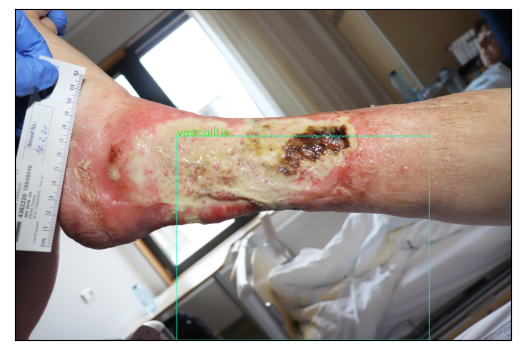

loading models
done

{'image_label': tensor(6), 'boxes': tensor([[1715.,  606., 2403.,  943.]]), 'labels': tensor([1]), 'masks': tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8), 'area': tensor([231856.]), 'iscrowd': tensor([0]), 'image_id': tensor(8111224345735540946)}


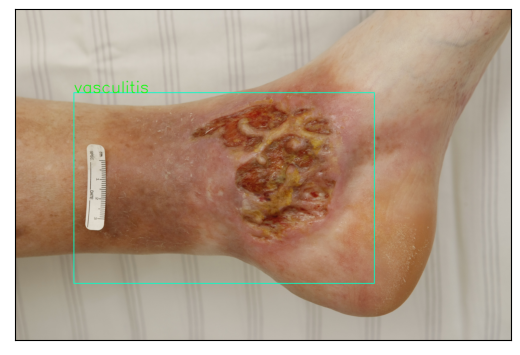

loading models
done

{'image_label': tensor(6), 'boxes': tensor([[ 626.,  394., 1932., 1539.],
        [ 300.,  422.,  579.,  727.]]), 'labels': tensor([1, 1]), 'masks': tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8), 'area': tensor([1495370.,   85095.]), 'iscrowd': tensor([0, 0]), 'image_id': tensor(8316143924857053992)}


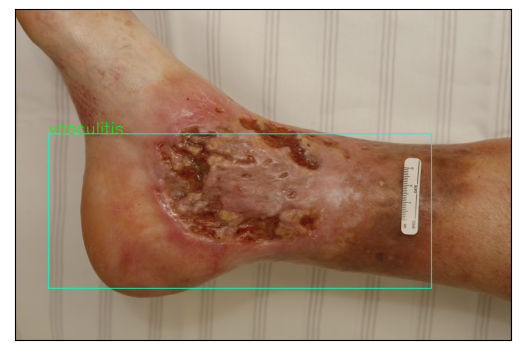

loading models
done

{'image_label': tensor(5), 'boxes': tensor([[1.2200e+03, 1.0000e+00, 2.4120e+03, 4.7600e+02],
        [1.0000e+00, 1.2000e+01, 6.6500e+02, 4.1100e+02]]), 'labels': tensor([1, 1]), 'masks': tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8), 'area': tensor([566200., 264936.]), 'iscrowd': tensor([0, 0]), 'image_id': tensor(2588390055748061857)}


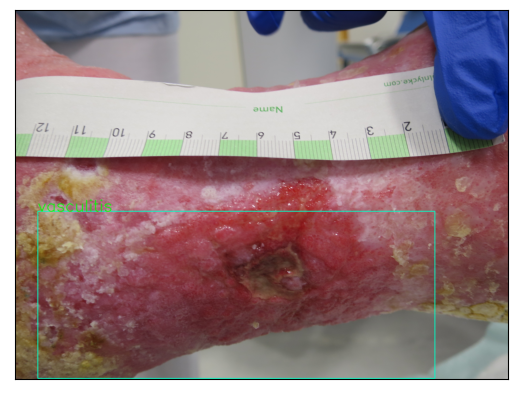

loading models
done

{'image_label': tensor(4), 'boxes': tensor([[2240.,  107., 2649., 1603.]]), 'labels': tensor([2]), 'masks': tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8), 'area': tensor([611864.]), 'iscrowd': tensor([0]), 'image_id': tensor(-2541438826272832719)}


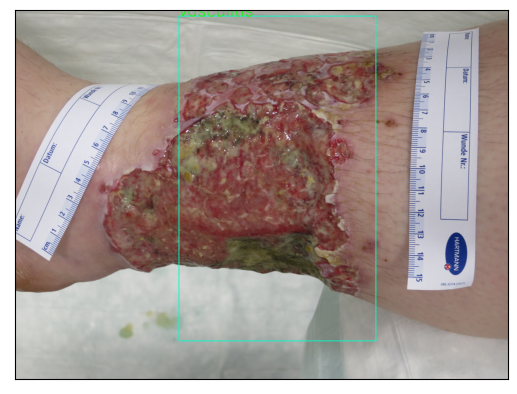

loading models
done

{'image_label': tensor(6), 'boxes': tensor([[2125.,  435., 2814., 1415.]]), 'labels': tensor([2]), 'masks': tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8), 'area': tensor([675220.]), 'iscrowd': tensor([0]), 'image_id': tensor(-4612098818358887920)}


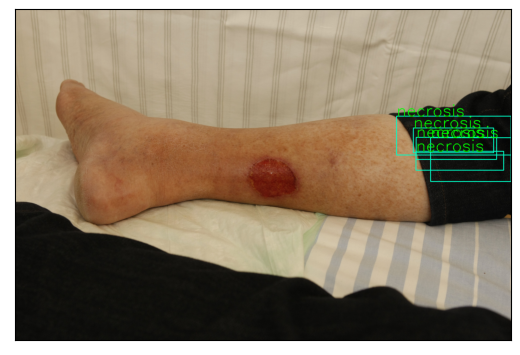

loading models
done

{'image_label': tensor(5), 'boxes': tensor([[ 988., 1011., 1217., 1283.],
        [5170., 1496., 5470., 1699.]]), 'labels': tensor([1, 2]), 'masks': tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8), 'area': tensor([62288., 60900.]), 'iscrowd': tensor([0, 0]), 'image_id': tensor(-6498067793565709129)}


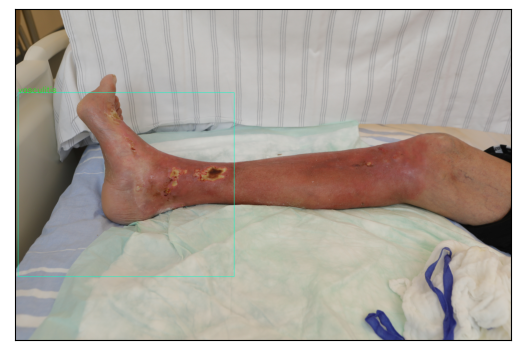

loading models
done

{'image_label': tensor(1), 'boxes': tensor([[1030.,  401., 1739., 1410.]]), 'labels': tensor([1]), 'masks': tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8), 'area': tensor([715381.]), 'iscrowd': tensor([0]), 'image_id': tensor(4872504417593022229)}


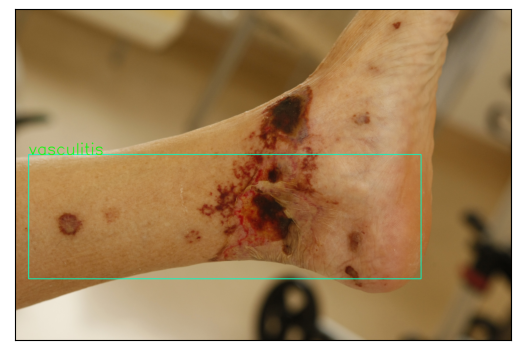

loading models
done

{'image_label': tensor(1), 'boxes': tensor([[1193.,  803., 1818., 1059.],
        [2910.,  981., 3509., 1695.],
        [ 848., 1141., 2511., 2120.]]), 'labels': tensor([1, 1, 1]), 'masks': tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8), 'area': tensor([ 160000.,  427686., 1628077.]), 'iscrowd': tensor([0, 0, 0]), 'image_id': t

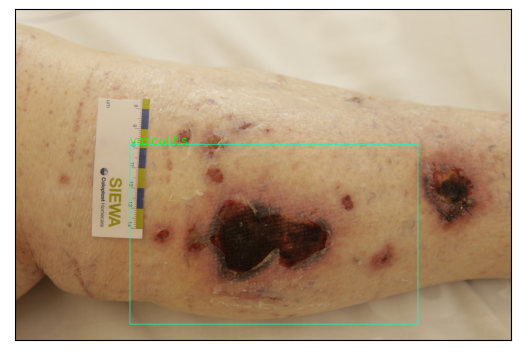

loading models
done

{'image_label': tensor(6), 'boxes': tensor([[1.0000e+00, 7.4100e+02, 4.8330e+03, 2.9330e+03]]), 'labels': tensor([1]), 'masks': tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8), 'area': tensor([10591744.]), 'iscrowd': tensor([0]), 'image_id': tensor(-1360139490111635901)}


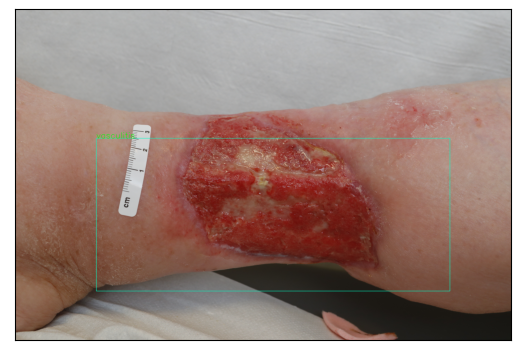

loading models
done

{'image_label': tensor(6), 'boxes': tensor([[9.7300e+02, 2.1600e+02, 1.9460e+03, 1.0940e+03],
        [1.0000e+00, 3.1300e+02, 2.8140e+03, 1.7760e+03]]), 'labels': tensor([1, 1]), 'masks': tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8), 'area': tensor([ 854294., 4115419.]), 'iscrowd': tensor([0, 0]), 'image_id': tensor(-4697800740733053011)}


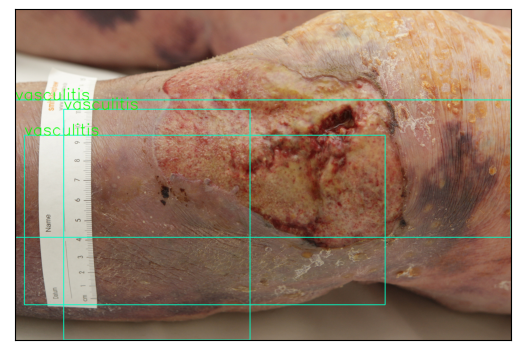

loading models


In [ ]:
model_path = "/media/doom/GG2/skin-project/models_5/best_models/best_fold=0_faster_rcnn_resnet50_fpn_detectionSingle_all_model_IoU_precision_0.5_bbox=0.0226.pt"
for i in range(len(dataset)):
    plot_sample(i, model_path)


In [ ]:
# sample_19 = dataset[19]
# x,y = sample_19
# x = torch.unsqueeze(x,0)

In [ ]:
# with torch.no_grad():
#     pred_19 = model(x)
# #     pred_19 = torch.sigmoid(pred_19)
#     pred_19 = torch.softmax(pred_19,dim=1)

In [21]:
# target_num_to_str = {v:k for k,v in target_str_to_num.items()}
# print(target_num_to_str)
# fname_19 = os.path.join(dataset.images_dir, dataset.image_fnames[0])

# image_19 = read_image(fname_19).numpy().transpose(1,2,0)
# print(sample_19[1])
# pred = [float(f'{x:.3f}') for x in pred_19.squeeze().tolist()]
# print(pred)
# # plt.imshow(image_19)
# # plt.show()
# width = 0.3
# ind = np.array([0,1,2,3,4,5,6,7,8])
# plt.bar(ind, sample_19[1], width=width, label='y_true')
# plt.bar(ind+width, pred_19.squeeze().numpy(), width=width, label='y_pred')
# plt.xticks(ind + width / 2, (target_num_to_str[v] for v in range(len(target_str_to_num))), rotation=90)
# plt.legend()
# plt.show()

# Conversion of code

In [22]:
import json

In [75]:
with open("/run/media/doom/GG2/skin-project/skin_config/PixelAnnotationToolConfigs/skinLesion.json") as f:
    a = json.load(f)
    print([a['labels'][k]['id'] for k in a['labels'].keys() if a['labels'][k]['categorie']  == 'lesion'])    
    print([a['labels'][k] ['name'] for k in a['labels'].keys()] )

[2, 3, 7, 8, 9, 10, 11]
['Bland Skin', 'Granulation', 'fibrin', 'scar', 'hyperpigmentation', 'dry skin', 'erythema', 'macerated skin', 'necrosis', 'hematoma/petechiae', 'vessel', 'poikolderm skin', 'External object 1', 'External object 2', 'External object 3', 'External object 4', 'Background']


In [24]:
dataset.load_detection()

./data/images/BLAND_17_TP0_IMAGIC_2110270675729_watershed_mask.png
./data/images/BLAND_26_TP3_IMAGIC_1705120289233_watershed_mask.png
./data/images/BLAND_30_IMAGIC_1711090345295_watershed_mask.png
./data/images/BLAND_38_A2_IMAGIC_1711130346238_watershed_mask.png
./data/images/BLAND_41_TP2_A1_4162401_11623458_S_Nr_001_005_watershed_mask.png
./data/images/BLAND_49_IMAGIC_2007270587776_watershed_mask.png
./data/images/BLAND_52_IMAGIC_1610050234022_watershed_mask.png
./data/images/BLAND_8_IMAGIC_2009040595875_watershed_mask.png
./data/images/CONTACT_DERMATITIS_21_IMAGIC_2201200688146_watershed_mask.png
./data/images/CONTACT_DERMATITIS_6_TP4_IMAGIC_1910230529589_watershed_mask.png
./data/images/INFECTION_18_IMAGIC_2201200687915_watershed_mask.png
./data/images/INFECTION_19_IMAGIC_1608100196594_watershed_mask.png
./data/images/INFECTION_22_IMAGIC_1606070178238_watershed_mask.png
./data/images/MALIGNANT_19_IMAGIC_1802070361540_watershed_mask.png
./data/images/MALIGNANT_23_IMAGIC_1905310497518

In [70]:
mask_0 = dataset.detection[dataset.image_fnames[1]].float().numpy().transpose(1,2,0)
# print(mask_0.max(axis=2))
# mask_0 = 255*(mask_0 - mask_0.min())/(mask_0.max()-mask_0.min())
# plt.imshow(mask_0)

In [72]:
sum(mask_0 == 1 ).sum()

13180122

#### Auxliary code

In [9]:
dataset = all_dataloader.dataset

file:  BLAND_17_TP0_IMAGIC_2110270675729.jpg


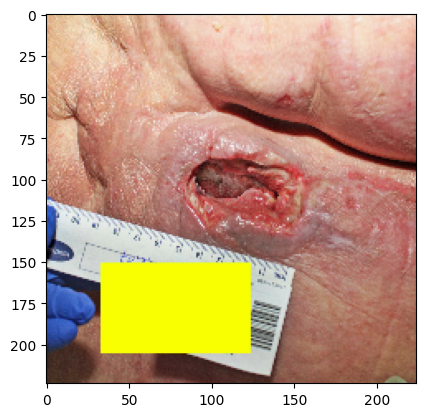

In [21]:
data_0 = dataset[0][0].numpy().transpose(1,2,0)
data_0 = 255.0 * (data_0-np.min(data_0))/(np.max(data_0)-np.min(data_0))
data_0 = data_0.astype(int)
plt.imshow(data_0)
print('file: ', dataset.image_fnames[0])

y:  tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1000, 0.9000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000],
        [0.1000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.9000],
        [0.1000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.9000],
        [0.1000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.9000],
        [0.0500, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.9500],
        [0.2000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.8000],
        [0.0000, 0.0000, 0.4000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6000],
        [0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1000, 0.4000],
        [0.9000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1000],
        [0.2000, 0.0000, 0.1000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6000, 0.1000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6000, 0.4000],
        [0.0

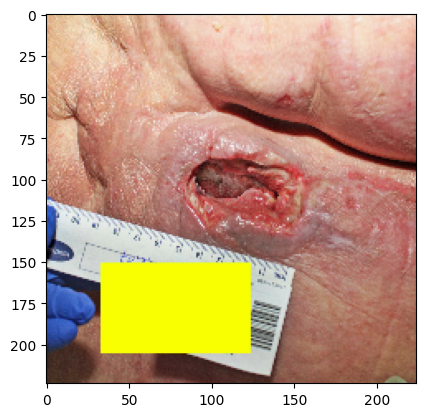

In [25]:
for x,y in all_dataloader:
#     print('x: ', x)
    print('y: ', y)
    break
data_0 = x[0]
data_0 = dataset[0][0].numpy().transpose(1,2,0)
data_0 = 255.0 * (data_0-np.min(data_0))/(np.max(data_0)-np.min(data_0))
data_0 = data_0.astype(int)
plt.imshow(data_0)
print('file: ', dataset.image_fnames[0])

In [98]:
print("Contact_Dermatitis_1_IMAGIC_2110200674483" in labels['Image Capture'].tolist())
print(labels['Image Capture'][0])

True
Contact_Dermatitis_1_IMAGIC_2110200674483


In [99]:
images_in = []
images_out = []
for image_fname in dataset.image_fnames:
    image_capture_name = image_fname.split('.')[0]
    if image_capture_name not in labels['Image Capture'].tolist():
        images_out.append(image_capture_name)
    else:
        images_in.append(image_capture_name)
    

In [100]:
capture_to_fname = {}
for capture in labels['Image Capture'].tolist():
    found = False
    for image_fname in dataset.image_fnames:
        if image_fname.startswith(capture):
            if capture in capture_to_fname.keys():
                L = capture_to_fname[capture]
                L.append(image_fname)
                capture_to_fname[capture] = L
                print('new')
                found = True
            else:
                capture_to_fname[capture] = [image_fname]
                found = True
    if not found:
        capture_missing_files 
            
                


In [101]:
fname_labels = {}
for fname in dataset.image_fnames:
    image_capture = list(filter(lambda x: fname.startswith(x), labels['Image Capture']))
    if len(image_capture)>1:
        print('Warning: more that one matching for file')
    elif len(image_capture) == 0:
        print('Warning: image filename has no matching image capture entry')
        continue
    image_capture = image_capture[0]
    label = labels['Percentages of diagnoses'].loc[labels['Image Capture'] == image_capture]
    # Convert to text
    label =  str(label.tolist()[0])
    try:
        values = { x.split('%')[1].strip(): float(x.split('%')[0]) for x in label.split(',')}
    except Exception as e:
        print(f'Warining: parsing label "{label}" string in xlsx table', e)
        continue
    fname_labels[fname] = values

Warining: parsing label "nan" string in xlsx table list index out of range
Warining: parsing label "nan" string in xlsx table list index out of range
Warining: parsing label "90% bland, 10% stasis dermatitis, slight erythema " string in xlsx table list index out of range


In [102]:
all_labels = []
for a in fname_labels.values():
    all_labels.extend(a.keys())
all_labels = set(all_labels)
print(all_labels)

{'vasculitis', 'bland', 'pyoderma', 'malignant', 'ulceration', 'bland.', 'necrosis', 'blande', 'contact dermatitis', 'infection', 'vasculitits', 'balnd', '(contact) dermatitis', 'vaskulitis', '(contact)dermatits', '(contact)dermatitis', 'infecrion', 'dermatitis'}


In [103]:
fname_labels

{'BLAND_10_IMAGIC_1903280475330 (2).JPG': {'bland': 95.0,
  '(contact)dermatitis': 5.0},
 'BLAND_11_IMAGIC_1506030107297.JPG': {'bland': 100.0},
 'BLAND_12_TP0_IMAGIC_1901310453071.JPG': {'bland': 80.0,
  '(contact)dermatitis': 20.0},
 'BLAND_12_TP1_IMAGIC_1903070469594.JPG': {'bland': 90.0,
  '(contact)dermatitis': 10.0},
 'BLAND_12_TP2_IMAGIC_2009070597631.JPG': {'bland': 80.0,
  '(contact)dermatitis': 20.0},
 'BLAND_13_TP0_A1_IMAGIC_1503180090839.JPG': {'bland': 95.0,
  '(contact)dermatitis': 5.0},
 'BLAND_13_TP0_A2_IMAGIC_1503180090842.JPG': {'bland': 95.0,
  '(contact)dermatitis': 5.0},
 'BLAND_13_TP0_A3_IMAGIC_1503180090847.JPG': {'bland': 95.0,
  '(contact)dermatitis': 5.0},
 'BLAND_13_TP0_A4_IMAGIC_1503180090849.JPG': {'bland': 95.0,
  '(contact)dermatitis': 5.0},
 'BLAND_13_TP1_A1_IMAGIC_1504300099129.JPG': {'bland': 80.0, 'pyoderma': 20.0},
 'BLAND_13_TP1_A2_IMAGIC_1504300099122.JPG': {'bland': 80.0, 'pyoderma': 20.0},
 'BLAND_13_TP1_A3_IMAGIC_1504300099126.JPG': {'bland': 80

In [54]:
capture_missing_files

['NECROSIS_11_TP3_IMAGIC_1907240508035',
 'BLAND_29_TP1_IMAGIC_1911260540481',
 'BLAND_29_TP2_IMAGIC_1912030542489',
 'BLAND_51_IMAGIC_1804260388611',
 'BLAND_53_IMAGIC_1805150392576',
 'BLAND_63_IMAGIC_1606140179680',
 'PYODERMA_7_TP2_IMAGIC_1607200186560']

In [47]:
len(capture_to_fname)

306

In [45]:
for k, v in capture_to_fname.items():
    if len(v)==1:
        print('=========> ')
        print(k)
        print(v)
        print('--------->')

=========> 
Contact_Dermatitis_1_IMAGIC_2110200674483
['Contact_Dermatitis_1_IMAGIC_2110200674483.JPG']
--------->
=========> 
Contact_Dermatitis_2_4146839_11942094_S_Nr_001_002
['Contact_Dermatitis_2_4146839_11942094_S_Nr_001_002.JPG']
--------->
=========> 
Contact_Dermatitis_3_IMAGIC_1804160383316
['Contact_Dermatitis_3_IMAGIC_1804160383316.JPG']
--------->
=========> 
Contact_Dermatitis_4_A1_IMAGIC_1905310497387
['Contact_Dermatitis_4_A1_IMAGIC_1905310497387.JPG']
--------->
=========> 
Contact_Dermatitis_4_A2_IMAGIC_1905310497389
['Contact_Dermatitis_4_A2_IMAGIC_1905310497389.JPG']
--------->
=========> 
Contact_Dermatitis_4_A3_IMAGIC_1905310497392
['Contact_Dermatitis_4_A3_IMAGIC_1905310497392.JPG']
--------->
=========> 
Contact_Dermatitis_4_A4_IMAGIC_1905310497396
['Contact_Dermatitis_4_A4_IMAGIC_1905310497396.JPG']
--------->
=========> 
Contact_Dermatitis_5_TP1_IMAGIC_2201240688309
['Contact_Dermatitis_5_TP1_IMAGIC_2201240688309.JPG']
--------->
=========> 
Contact_Dermatitis

In [50]:
len(images_out)

156

In [52]:
len(images_in)

303

In [31]:
dir({})

['__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

# Test files in location

In [33]:
import pandas as pd
import shutil
import os

In [27]:
a = pd.read_csv('images_files.txt', header=None, names=['name'])
b = pd.read_csv('images_files_2.txt', header=None, names=['name'])

In [41]:
missing_files = []
for bb in b['name'].tolist():
    if bb not in a['name'].tolist():
        missing_files.append(bb)
# os.mkdir('to_move')
for mm in missing_files:
    source = os.path.join('data',"images",mm)
    dest = os.path.join('to_move',mm)
    shutil.copy(source,dest)
    print(f' Done? {os.path.exists(dest)}')

 Done? True
 Done? True
 Done? True
 Done? True
 Done? True
 Done? True
 Done? True
 Done? True
 Done? True
 Done? True
 Done? True
 Done? True
 Done? True
 Done? True
 Done? True
 Done? True
 Done? True
 Done? True
 Done? True
 Done? True
 Done? True
 Done? True
 Done? True
 Done? True
 Done? True
 Done? True
 Done? True
 Done? True
 Done? True
 Done? True
 Done? True
 Done? True
 Done? True
 Done? True
 Done? True
 Done? True
 Done? True
 Done? True
 Done? True
 Done? True
 Done? True
 Done? True
 Done? True
 Done? True
 Done? True
